訓練部分の各ステップの各銘柄の保有数の変動を見る　trainのみ　eval除く

In [2]:
import pandas as pd
import matplotlib.pyplot as plt         
import os        
import re
import sys

In [47]:
#log_pathからpltに用いるdfを作成

def make_df_from_log_path(log_path):
    search_string = "step:"
    output_lines = []

    with open(log_path, 'r') as file:
        lines = file.readlines()

        for i, line in enumerate(lines):
            try:
                if search_string in line:
                    # print(lines[i])
                    j=0
                    day_string = "day:"
                    while j<20:
                        if day_string in lines[i+j]:
                            # print(lines[i+j])
                            k=0
                            hold_string = "self.state[HOLDING_IDX~EMB_IDX]:"
                            while k<20:
                                if hold_string in lines[i+j+k]:
                                    # print(lines[i+j+k])
                                    l=0
                                    price_string = "self.state[TARGET_IDX:PRICEDIFF~IDX]:"
                                    while l<20:
                                        if price_string in lines[i+j+k+l]:
                                            # print(lines[i+j+k+l])
                                            break
                                        l += 1
                                    break
                                k += 1
                            break
                        j += 1
                        
                    
                    temp_str = lines[i] + lines[i+j] + lines[i+j+k] + lines[i+j+k+l]
                    output_lines.append(temp_str)
            except:
                pass
                # break   
                
                
                # if "train" in lines[i-1]:
                #     # print(lines[i-1], lines[i])
                #     temp_str = lines[i+1] + lines[i+2] +  lines[i+3] + lines[i+4] + lines[i+5] + lines[i+6]#i-nは[Evaluate]からn行上
                #     output_lines.append(temp_str)

    # sys.exit()
    data = output_lines
    # return output_lines

    # 各行をスペースで分割し、キーと値のペアに分ける
    parsed_data = [line.strip().split('\n') for line in data]
    # print(parsed_data[0])
    # sys.exit()

    # 各行のデータを辞書に格納し、DataFrameを作成する
    result = []
    for line in parsed_data:
        row_data = {}
        i=0
        for item in line:
            try:
                if(i<2):
                    key_value = item.split(':')
                    data_value = key_value[1].split(',')
                    # print(key_value[1])
                    
                    # m =re.search(r"\d+\.\d+|\-\d+\.\d", data_value[0])
                    m =re.search(r"\d+", key_value[1])
                    # print(m.group(0))
                    # print(float(m.group(0)), type(float(m.group(0))))
                    # break
                    row_data[key_value[0]] = int(m.group(0))
                
                if(i>=2):
                    key_value = item.split(':')
                    # print(key_value)
                    try:
                        array = eval(key_value[1]) #self.state[TARGET_IDX', 'PRICEDIFF~IDX]の配列を変換できない
                    except:
                        array = eval(key_value[2])
                    # print(array)
                    row_data[key_value[0]] = array
                # print(key_value[0], array)
                
            except:
                # print(item)
                pass
                
            i+=1
        result.append(row_data)
        
    # print(result)

    # DataFrameを作成する
    df = pd.DataFrame(result)
    # print(df)
    df = df[["step", "day", "self.state[HOLDING_IDX~EMB_IDX]", "self.state[TARGET_IDX"]]
    return df



In [ ]:
# log_path_11 = "../nodhup_outputs/withoneSEC_tf_1_2.log"
# df_11 = make_df_from_log_path(log_path_11)

log_path_13 = "../nodhup_outputs/tweetonly_3.log"
df_13 = make_df_from_log_path(log_path_13)

In [48]:
print(df_13)

        step    day                    self.state[HOLDING_IDX~EMB_IDX]  \
0        0.0    0.0  [9.721573027027384, 0, 8.240877060142884, 0, 7...   
1        1.0    1.0  [16.747238640085794, 0, 3.9413258487127445, 0,...   
2        2.0    2.0  [16.462382191034738, 0, 10.547995832885675, 0,...   
3        3.0    3.0  [12.850149380080532, 0, 7.446547608916199, 5.8...   
4        4.0    4.0  [14.877329079569598, 4.124131106494692, 6.9803...   
...      ...    ...                                                ...   
7891  7891.0  247.0  [0.0, 114.47853755950928, 0, 0, 119.9573516845...   
7892  7892.0  248.0  [0.0, 114.47853755950928, 0, 0, 119.9573516845...   
7893  7893.0  249.0  [0.0, 114.47853755950928, 0, 0, 119.9573516845...   
7894  7894.0  250.0  [0.0, 114.47853755950928, 0, 0, 119.9573516845...   
7895  7895.0  251.0  [0.0, 114.47853755950928, 0, 0, 119.9573516845...   

                                  self.state[TARGET_IDX  
0     [55.002766, 149.011078, 310.350006, 119.932266.

In [30]:
df = df_11
n=3
column = 'self.state[HOLDING_IDX~EMB_IDX]'
new_column = str(n) + "_" + column
df[new_column] = df['self.state[HOLDING_IDX~EMB_IDX]'].apply(lambda x: x[n] if isinstance(x, list) and len(x) > 0 else None)


In [ ]:
# df[:272].plot(y=new_column)
df[:544].plot(y=new_column)
df[:544].plot(y=new_column, x="day")
df.plot(y=new_column)

/home/fukuda/.conda/envs/Profit-naacl/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


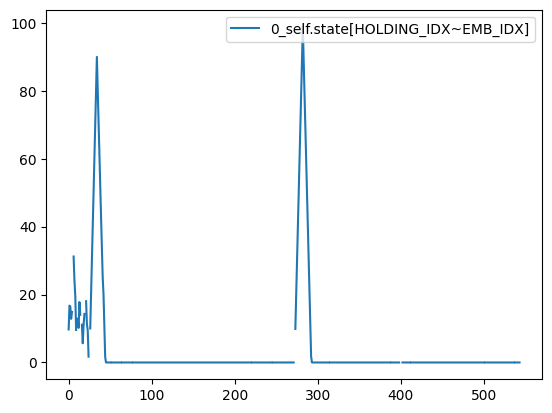

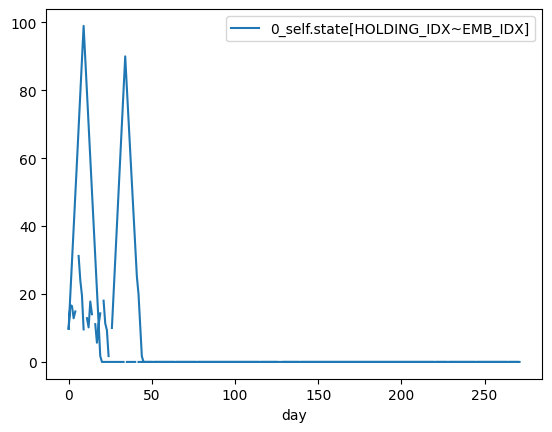

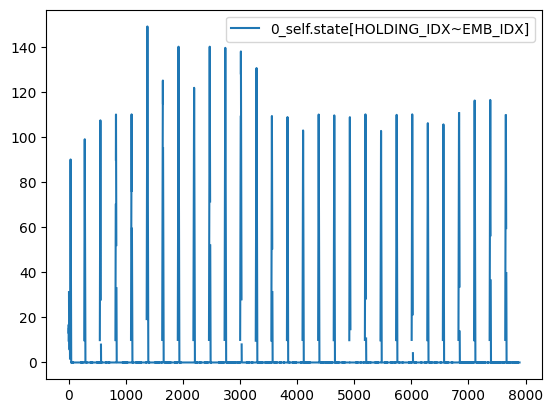

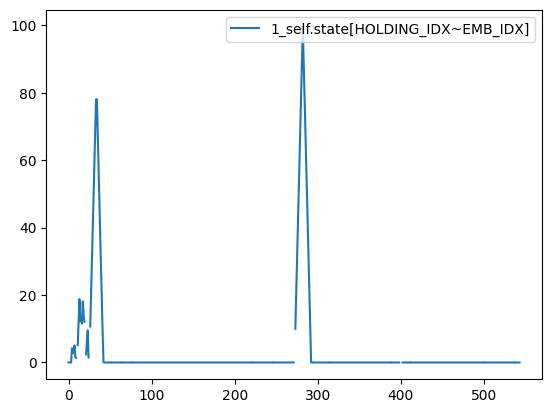

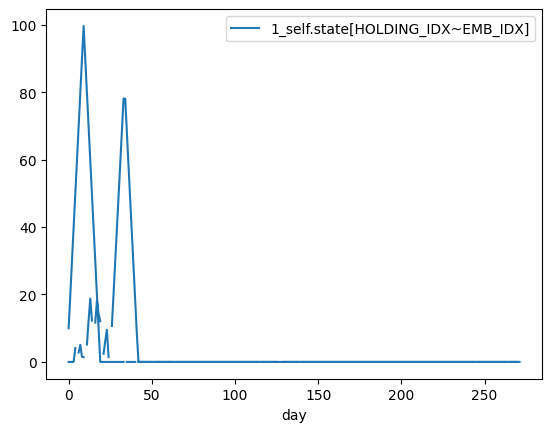

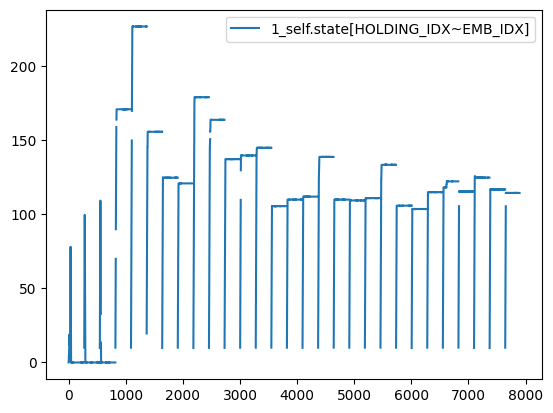

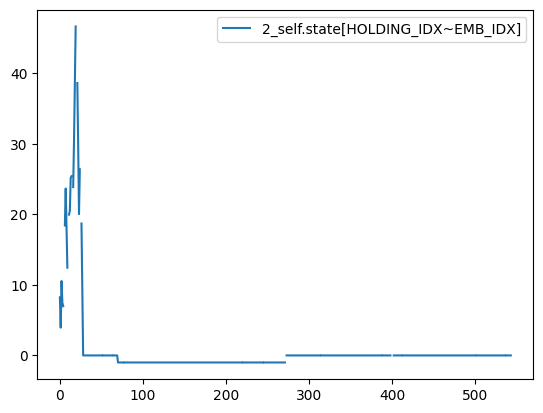

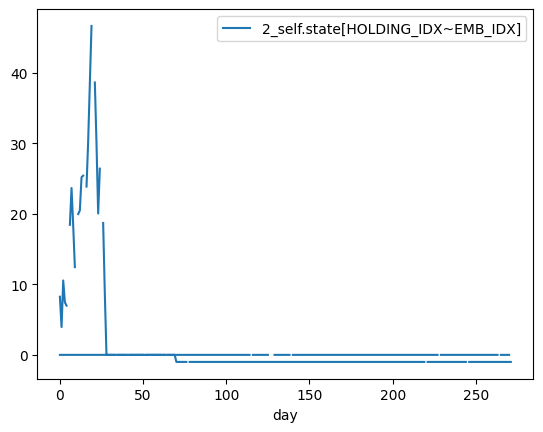

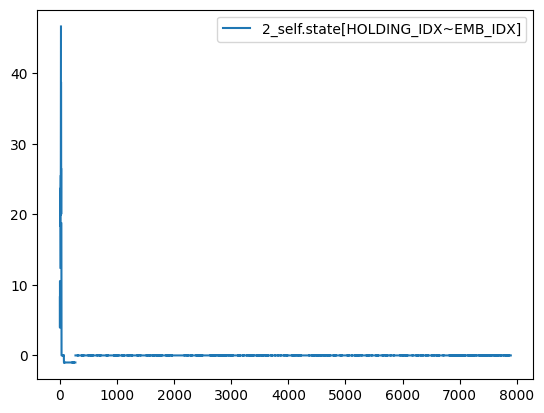

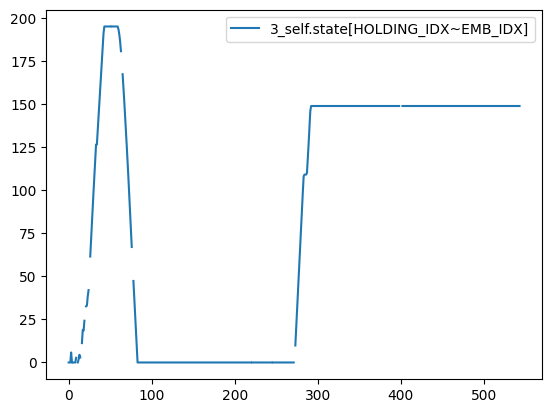

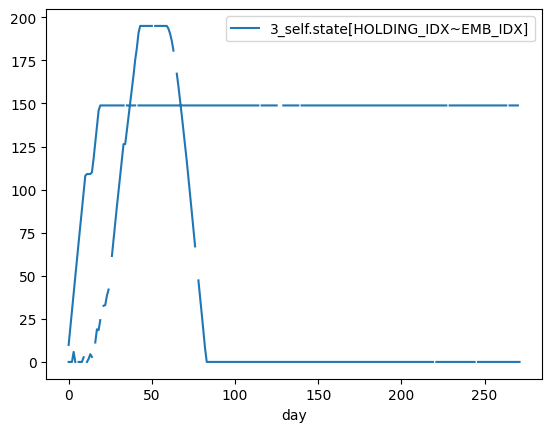

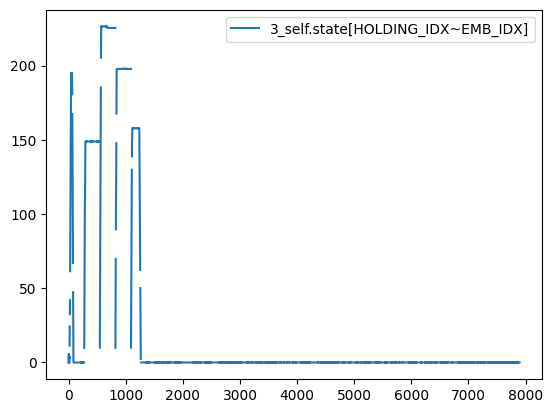

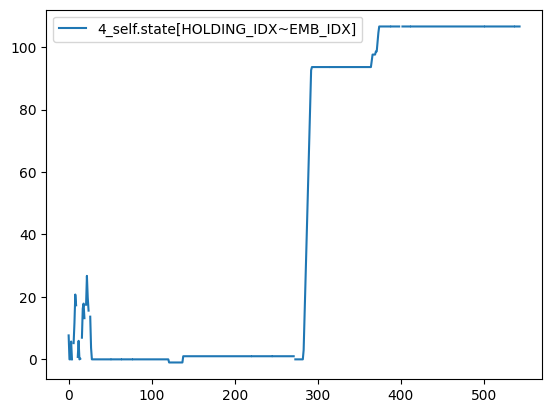

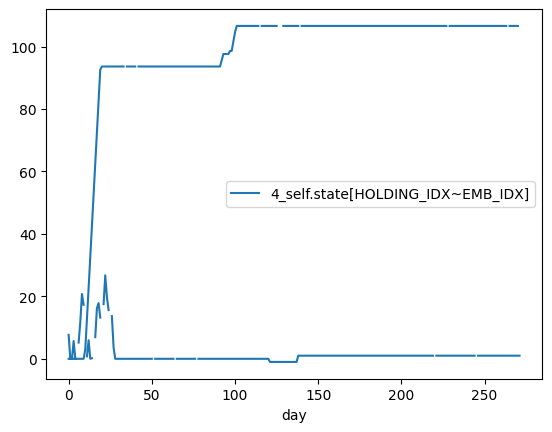

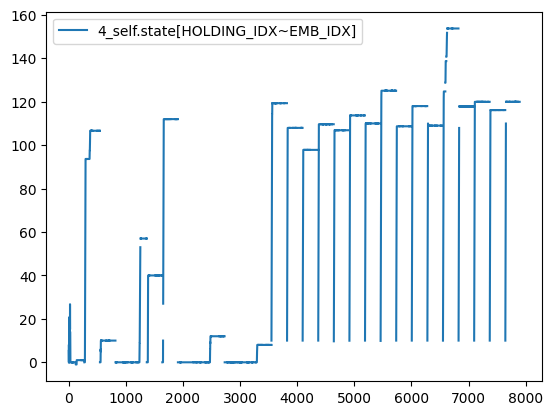

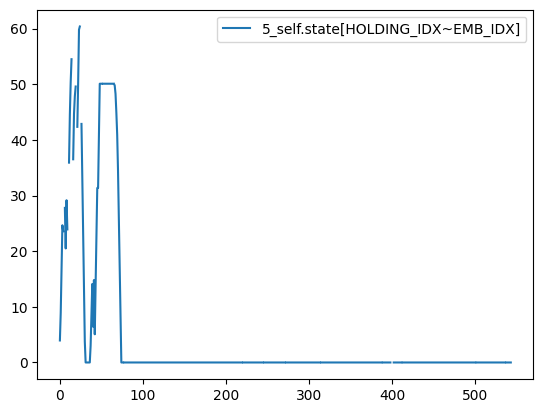

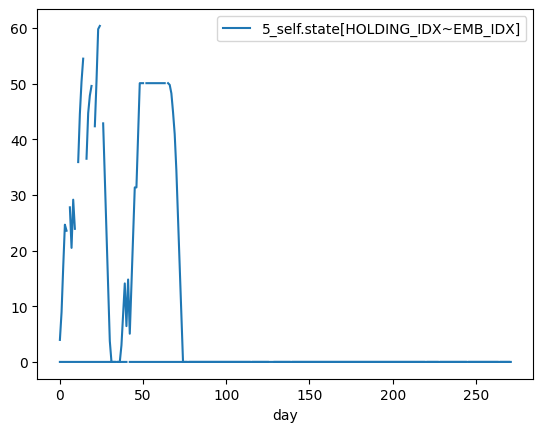

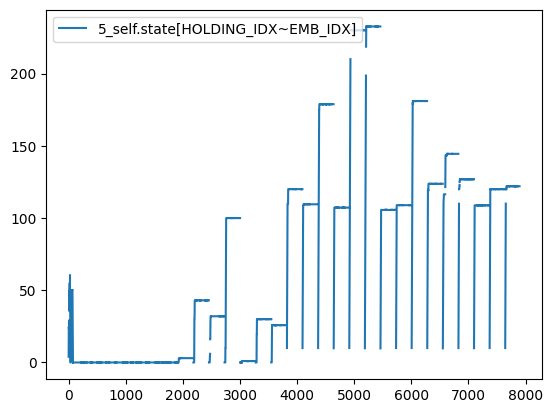

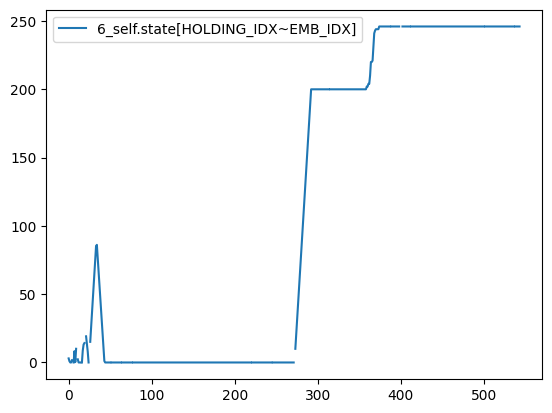

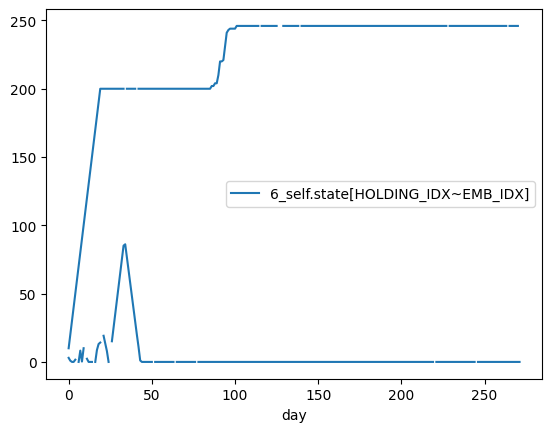

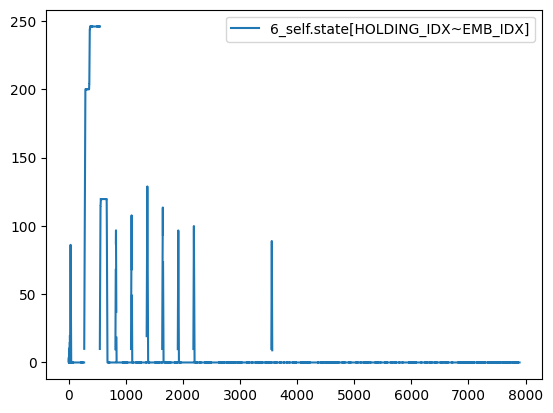

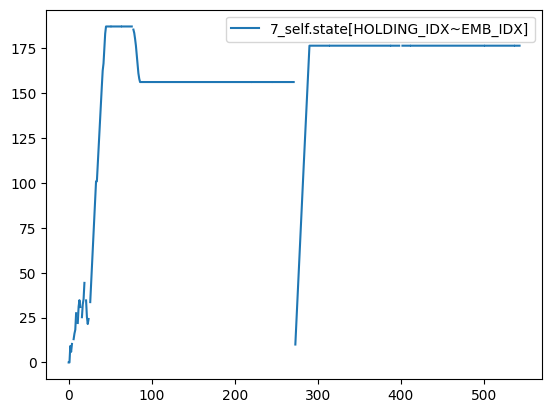

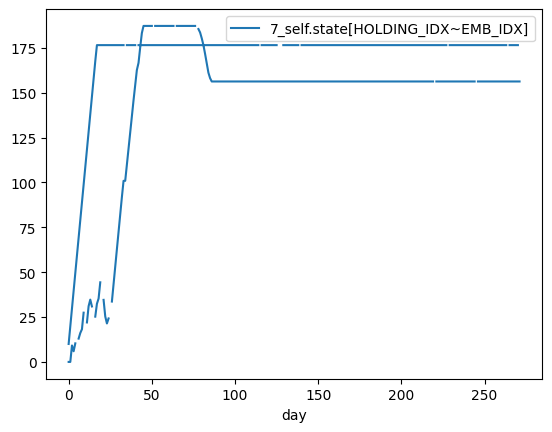

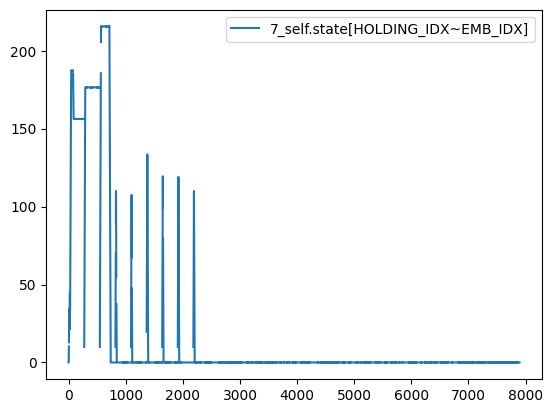

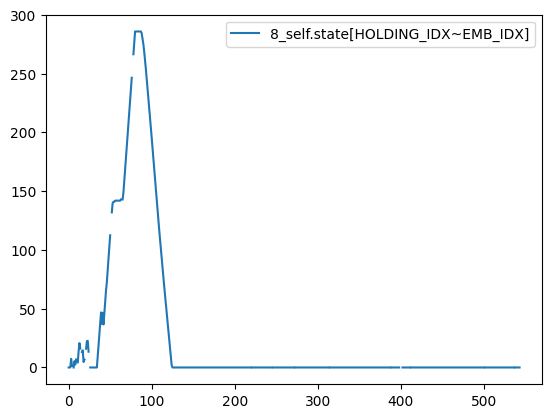

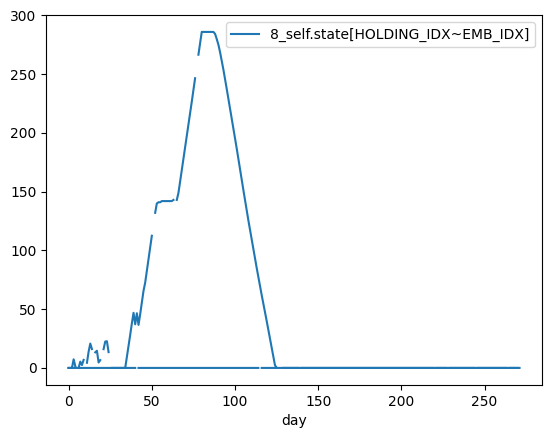

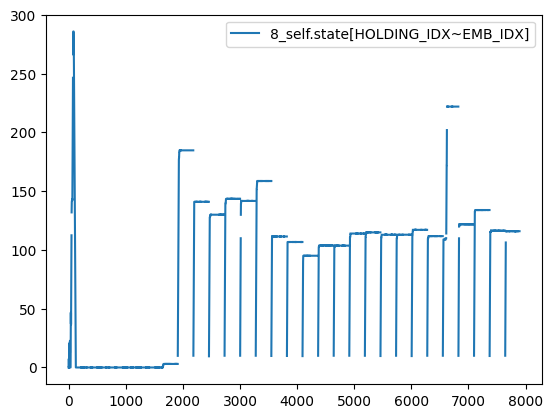

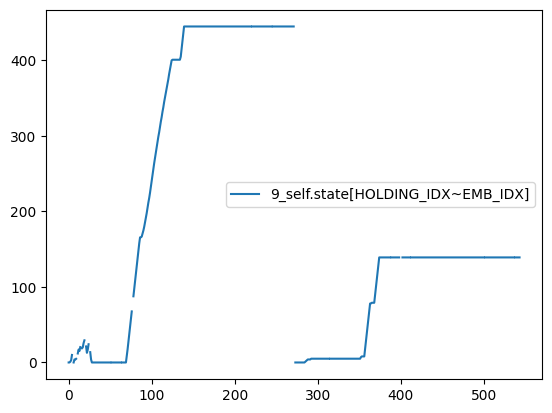

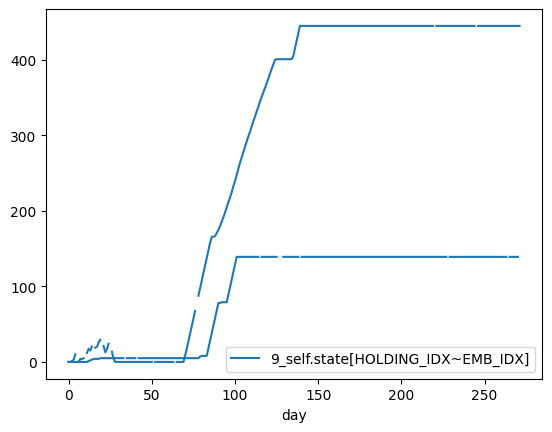

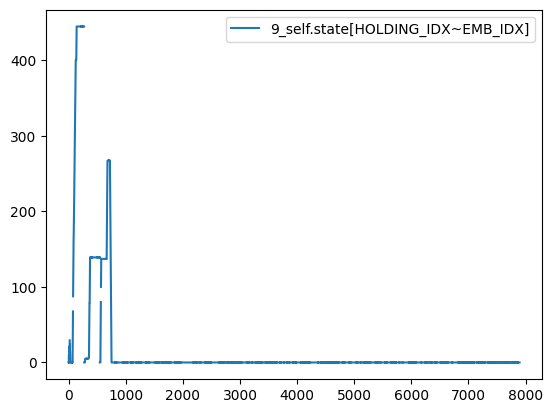

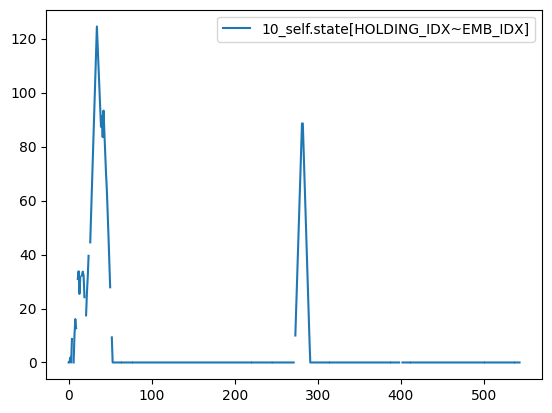

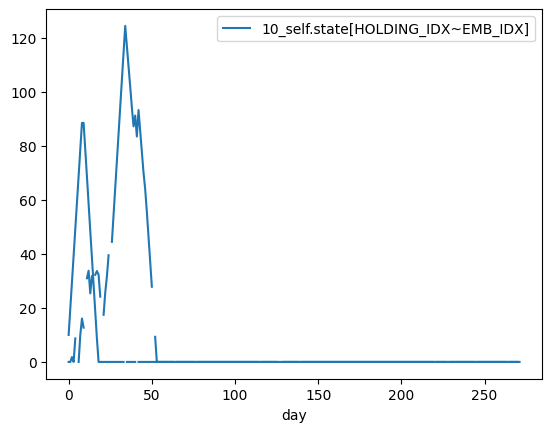

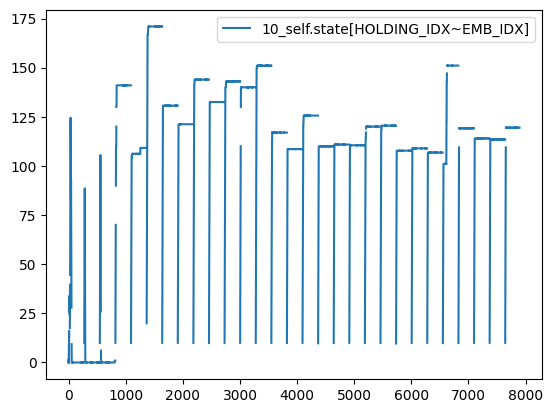

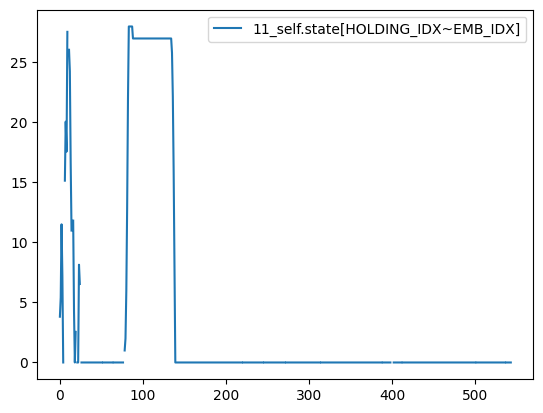

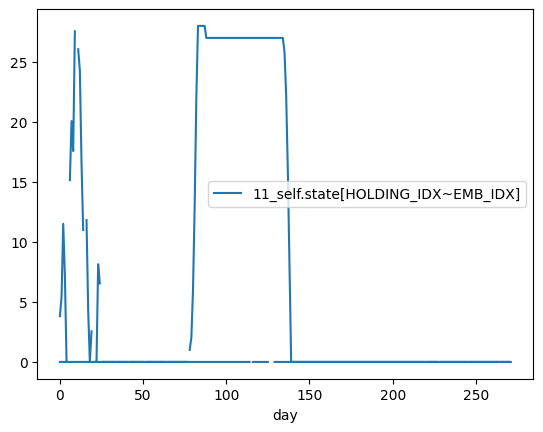

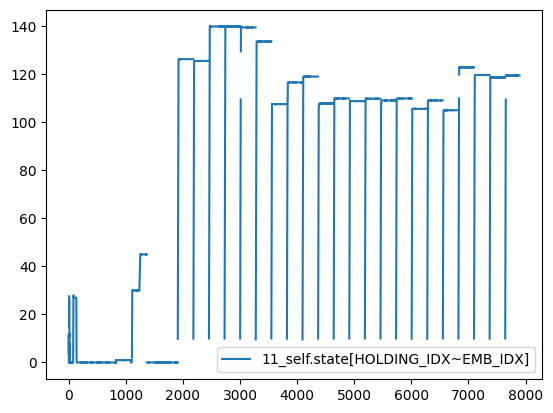

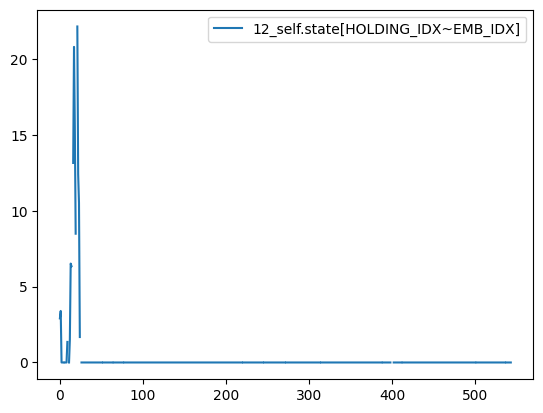

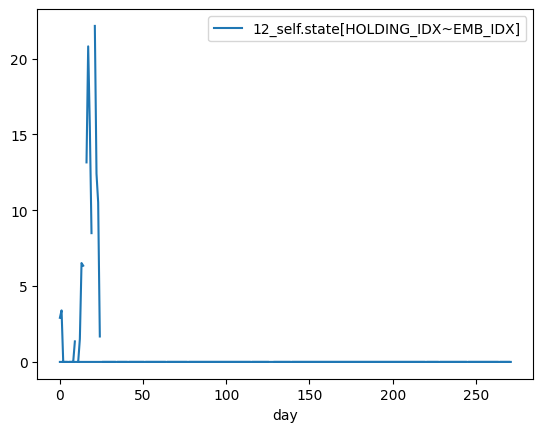

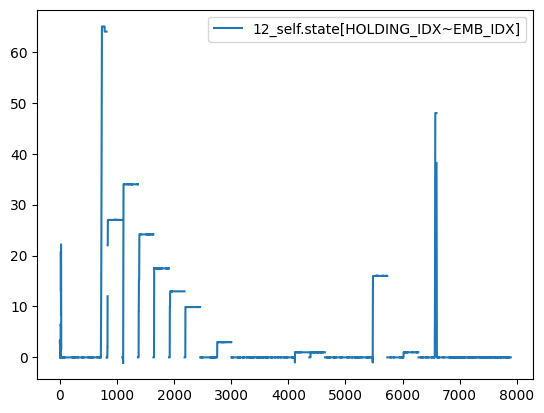

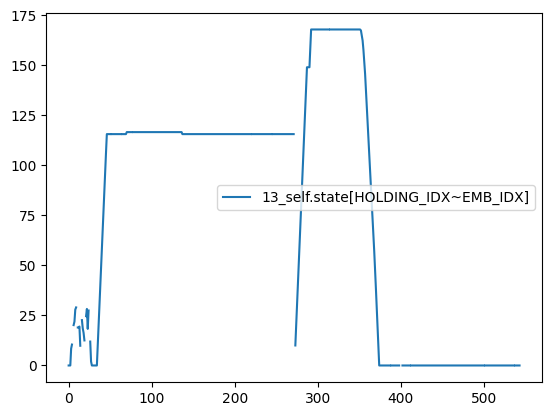

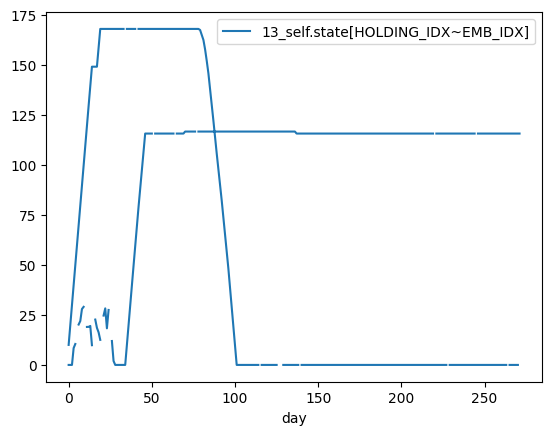

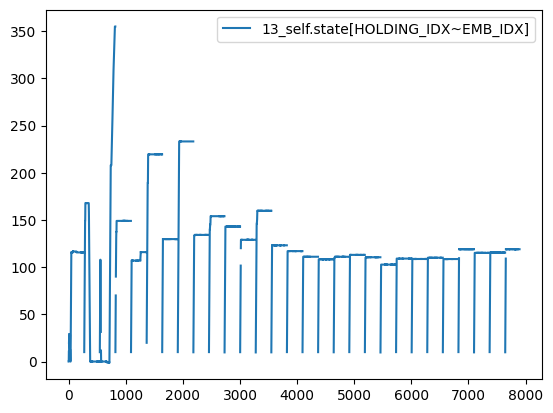

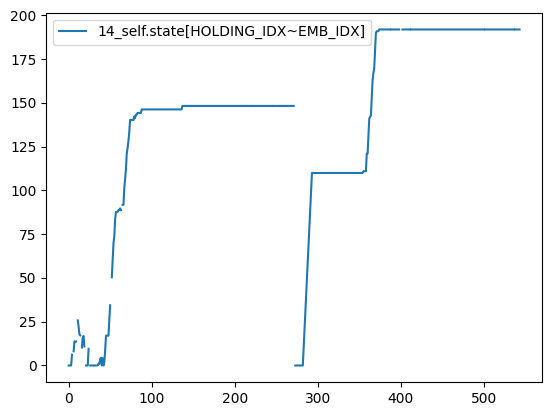

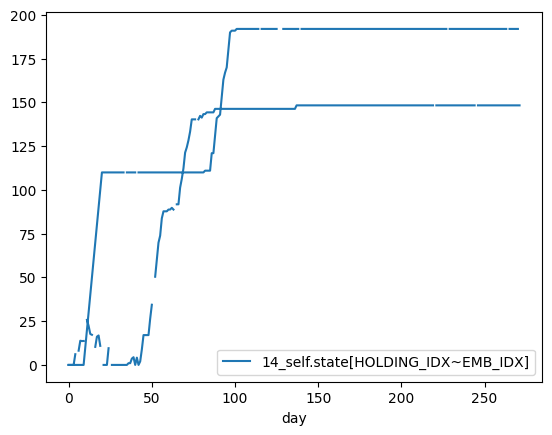

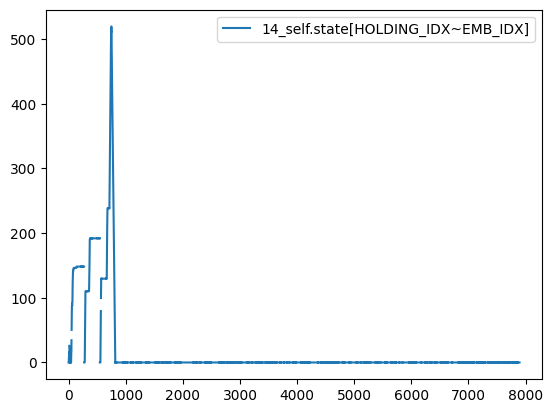

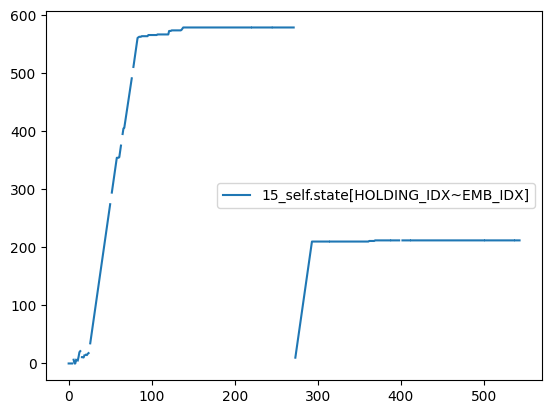

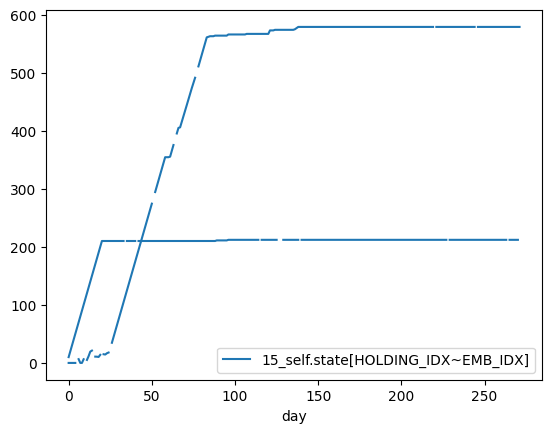

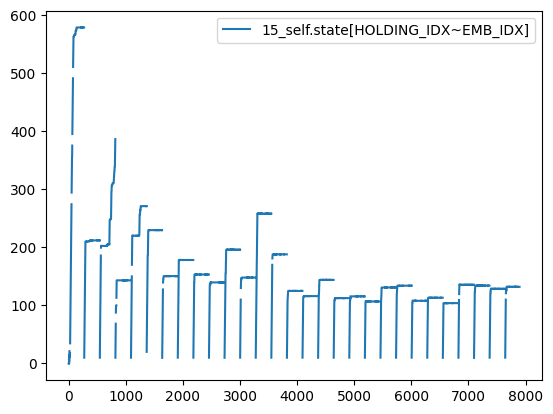

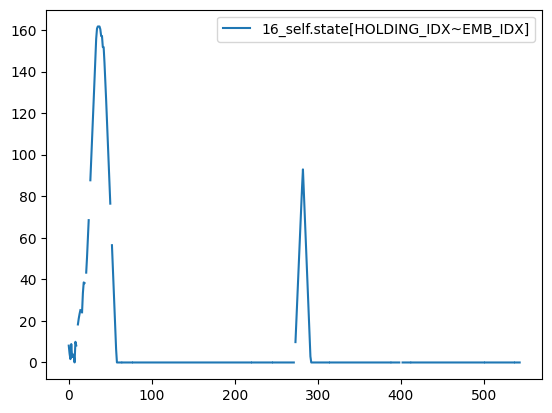

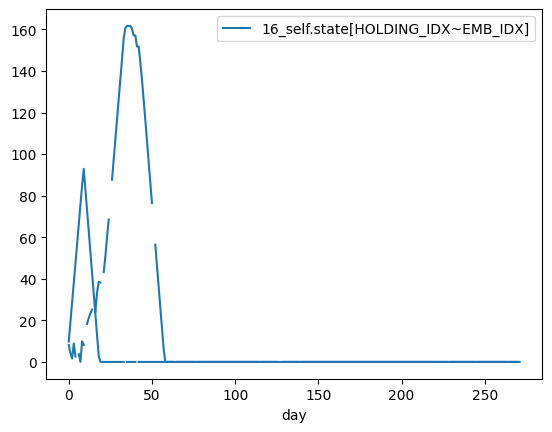

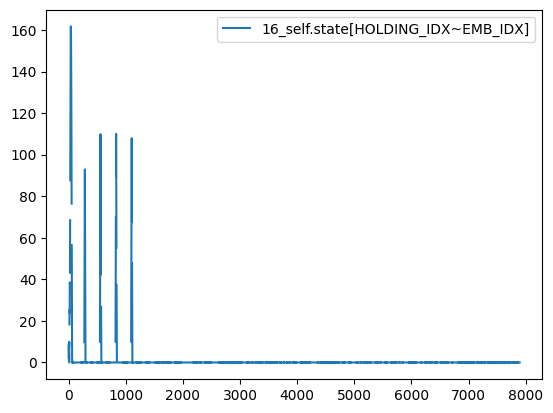

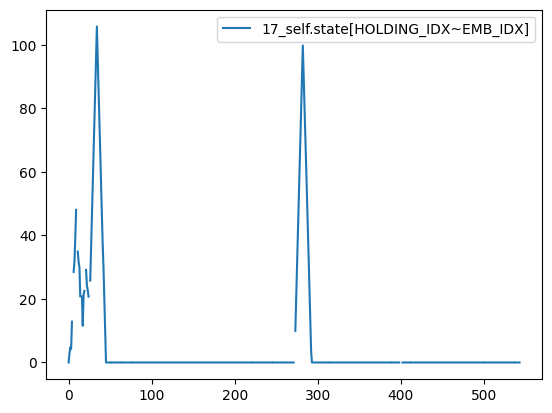

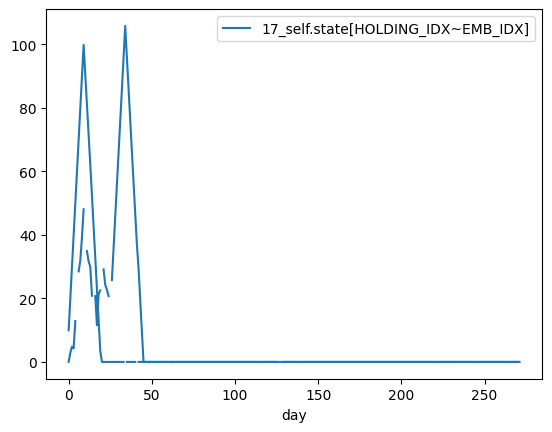

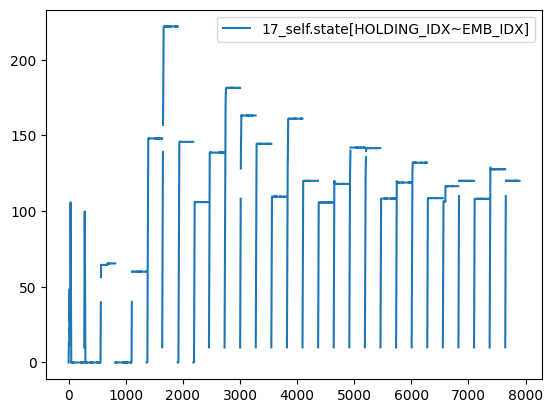

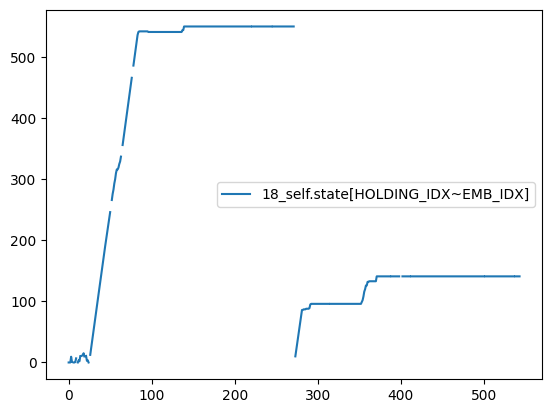

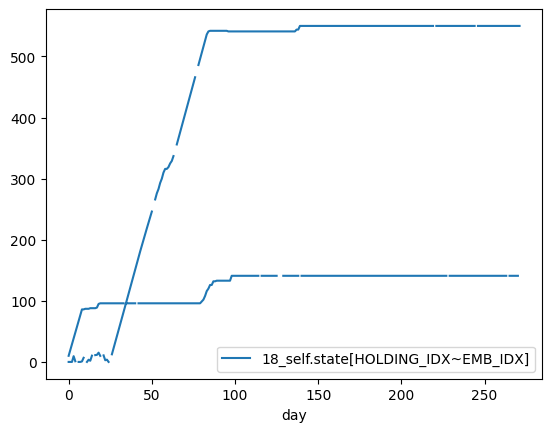

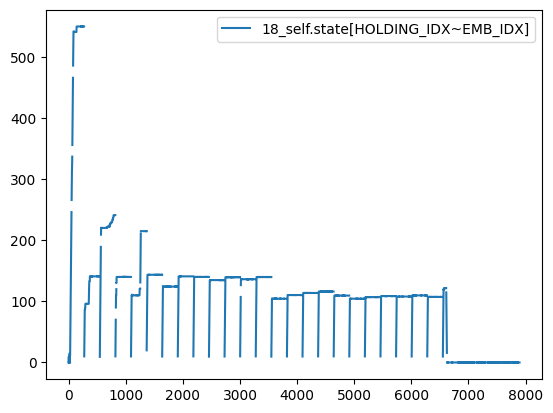

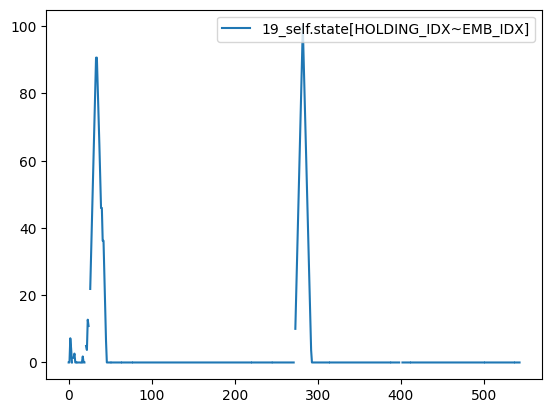

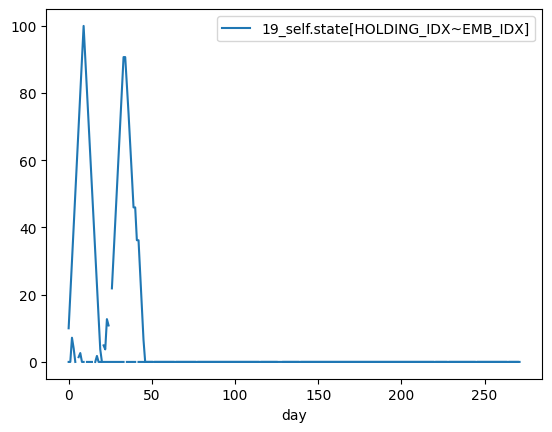

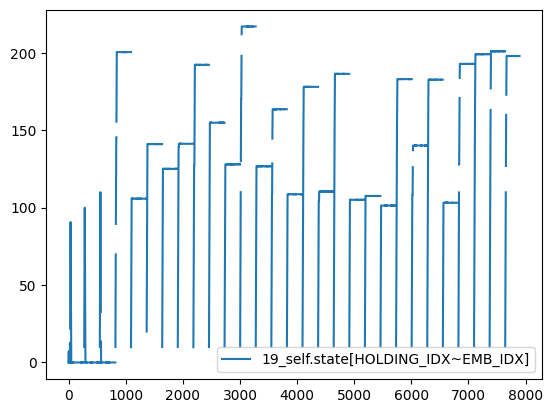

In [56]:
df = df_13
n=0
while n<20:
    new_column = str(n) + "_" + column
    df[new_column] = df['self.state[HOLDING_IDX~EMB_IDX]'].apply(lambda x: x[n] if isinstance(x, list) and len(x) > 0 else None)
    df[:544].plot(y=new_column)
    df[:544].plot(y=new_column, x="day")
    df.plot(y=new_column)
    n += 1


In [52]:


log_path_11 = "../nodhup_outputs/withoneSEC_tf_1_2.log"
df_11 = make_df_from_log_path(log_path_11)

log_path_12 = "../nodhup_outputs/withoneSEC_tf_2_random.log"
df_12 = make_df_from_log_path(log_path_12)

log_path_13 = "../nodhup_outputs/tweetonly_3.log"
df_13 = make_df_from_log_path(log_path_13)

In [5]:
dfs = [df_11]
log_files = [os.path.basename(log_path_11)]

In [11]:

dfs = [df_9, df_10, df_11, df_12, df_13]
log_files = [os.path.basename(log_path_9), os.path.basename(log_path_10), os.path.basename(log_path_11), os.path.basename(log_path_12), os.path.basename(log_path_13)]

In [52]:
print(df_9)

    end_total_asset  total_reward   total_cost
0      96120.364494   3879.635506  1855.874138
1     119583.463739           NaN          NaN
2     123567.775941           NaN          NaN
3     117791.599106  17791.599106   627.523073
4     116761.004071  16761.004071   883.433790
..              ...           ...          ...
68     98173.762155           NaN          NaN
69     98284.589606   1715.410394   492.503269
70     97920.486382   2079.513618   492.528288
71     98429.308782           NaN          NaN
72     98035.017056   1964.982944   492.552443

[73 rows x 3 columns]


In [ ]:
print(df_12)

In [8]:

df = df_9
filtered_df = df[(df['Step'] >= 1000) & (df['Step'] <= 3000)]
# print(filtered_df[["Step", "total_reward"]])
print(df.columns)

Index(['Step', 'mean_reward', 'mean_sharpe', 'mean_sortino', 'mean_calmar',
       'mean_mdd', 'mean_cum_returns', 'previous_total_asset', 'total_reward',
       '[1', '[2', '3.75s/it]total_reward', '[3', '[4',
       '3.76s/it]total_reward', '[5', '3.80s/it]total_reward', '[7', '[9',
       '[11', '[12', '[13', '[17', '[18', '[19', '[20'],
      dtype='object')


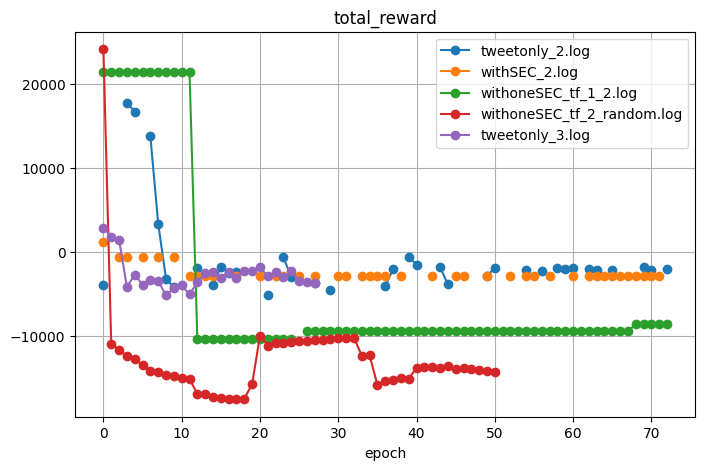

In [12]:
indicators = ["total_reward"]

for indicator in indicators:
# x軸にはdfの一列目のデータを、y軸には2列目以降のデータをプロットします
    plt.figure(figsize=(8, 5))  # グラフのサイズを設定します
    for df, log_file in zip(dfs, log_files):
        # df = df[(df['Step'] >= 0) & (df['Step'] <= 1000)] #期間調整
        for column in df[[indicator]]:  # ここで何をプロットするか設定  total_reward mean_sharpe　mean_mdd
            # plt.plot(df[df.columns[0]], (df[column]+100000)/100000, marker='o', label=log_file) #tortal reward
            plt.plot(df[column], marker='o', label=log_file)

    # df = df_2
    # df = df[:21]
    # for column in df.columns[1:2]:  # ここで何列目をプロットするか設定
    #     plt.plot(df[df.columns[0]], df[column], marker='o', label=column)

    plt.xlabel("epoch")  # x軸のラベルを設定します
    # plt.ylabel("Values")  # y軸のラベルを設定します
    title = column
    # title = "profit_ratio"
    plt.title(title)  # グラフのタイトルを設定します
    plt.legend()  # 凡例を追加します
    plt.grid(True)  # グリッドを表示します（オプション）

    # save_png_name = title + "_" + log_files[0] + "_" + log_files[1] + ".png"
    # save_folder = "/home/fukuda/profit-naacl/profit-naacl_2/pngs"
    # save_path = os.path.join(save_folder, save_png_name)
    # print(save_path)
    # plt.savefig(save_path)

    plt.show()  # グラフを表示します